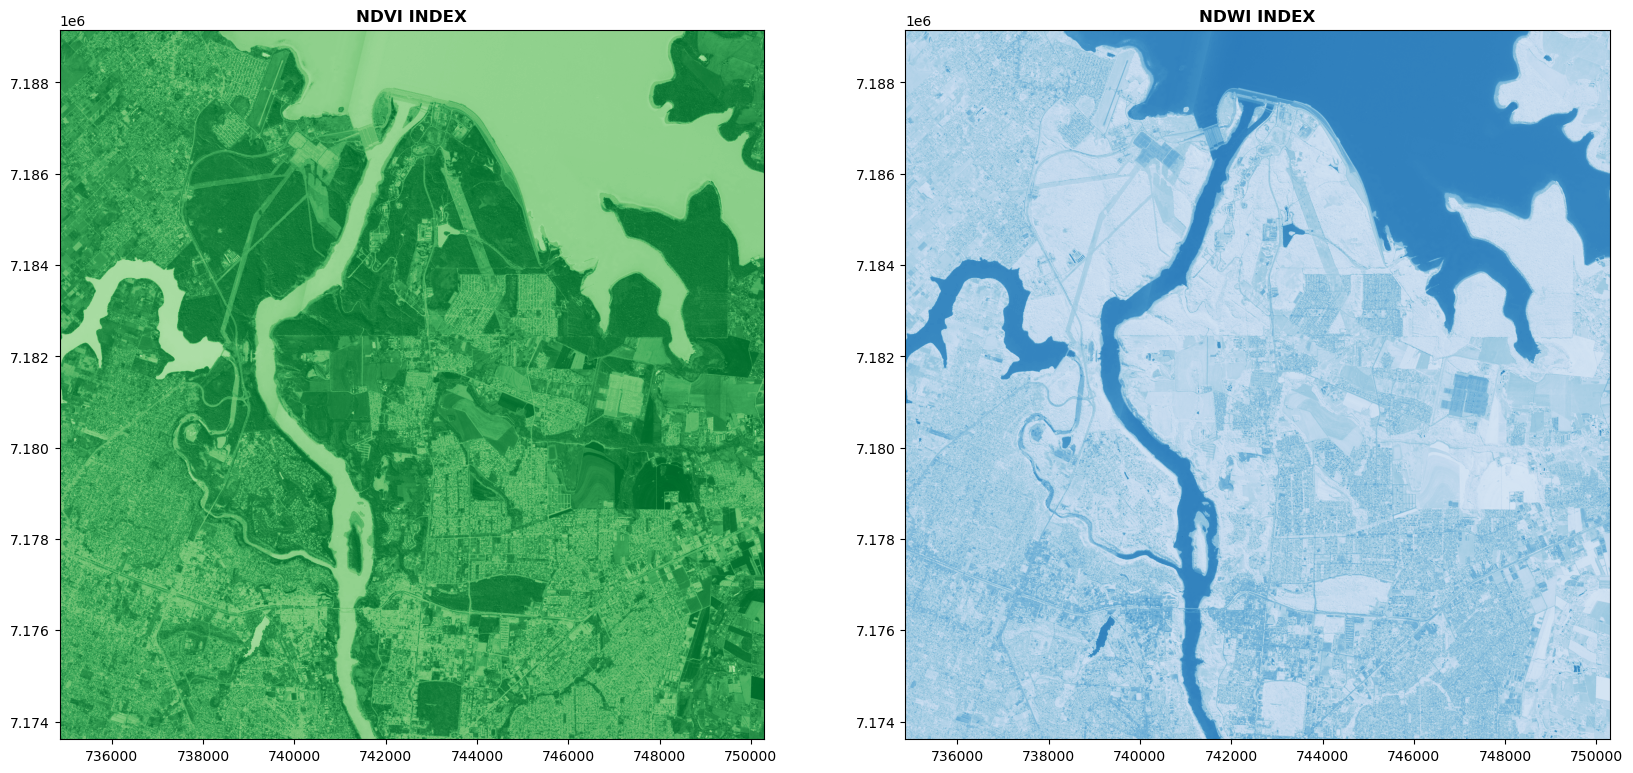

In [30]:
# Importando bibliotecas

import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show
import numpy as np

# Definindo variável universal

raster = 'cbers.tif'

# Função de normalização dos valores entre 0 e 1

def normalize(arr):
    
    norm_arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
    
    return norm_arr

# Função de leitura de bloco

def cbers_raster(raster):
    
    with rasterio.open(raster, 'r') as dst:
        
        band1 = dst.read(1)
        band2 = dst.read(2)
        band3 = dst.read(3)
        band4 = dst.read(4)
        profile = dst.profile
    
    return band1, band2, band3, band4, profile

# Função calculadora raster

def cbers_index():

    band1, band2, band3, band4, profile = cbers_raster(raster)

    # Normalizar os dados

    ir = normalize(band4)
    r = normalize(band3)
    g = normalize(band2)
    b = normalize(band1)

    # Índices

    ndvi = (ir - r) / (ir + r)
    ndwi = (g - ir) / (g + ir)

    return ndvi, ndwi, profile

# Função de plotagem

def plot_cbers():

    ndvi, ndwi, profile = cbers_index()

    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

    show(ndvi, cmap='Greens', transform=profile['transform'], ax=ax1, title='NDVI INDEX')
    show(ndwi, cmap='Blues', transform=profile['transform'], ax=ax2, title='NDWI INDEX')

    return 

def export():

    profile = cbers_raster(raster)[4]

    ndvi = cbers_index()[0]

    ndwi = cbers_index()[1]

    with rasterio.open('ndvi2.tif', 'w', **profile) as dst:
    
        dst.write(ndvi,1)

    with rasterio.open('ndwi2.tif', 'w', **profile) as dst:
    
        dst.write(ndwi,1)

plot_cbers()

export()